# Encoding

Encoding refers to the process of transforming data (particularly categorical data) into a format that can be used by machine learning algorithms. Many machine learning algorithms require numerical input, and encoding is the process of converting non-numeric data (such as text, labels, or categorical variables) into numerical representations that algorithms can understand.

In [1]:
df = sns.load_dataset('tips')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<IPython.core.display.Javascript object>

In [2]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [3]:
df['sex'].value_counts()

sex
Male      157
Female     87
Name: count, dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

### LabelEncoding

Label encoding assigns a unique integer to each category. This is useful when the categories have a natural order (i.e., they are ordinal).

In [5]:
le = LabelEncoder()
df['encoded_sex'] = le.fit_transform(df['sex'])

In [6]:
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,1
2,21.01,3.50,Male,No,Sun,Dinner,3,1
3,23.68,3.31,Male,No,Sun,Dinner,2,1
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [7]:
df['encoded_sex'].value_counts()

encoded_sex
1    157
0     87
Name: count, dtype: int64

### OrdinalEncoder

Ordinal encoding is a type of encoding similar to label encoding, but specifically for ordinal (ordered) categorical data. Here, you encode categories based on their order.

In [8]:
df['day'].value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [9]:
oe = OrdinalEncoder()
df['Encoded_day'] = oe.fit_transform(df[['day']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex,Encoded_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,2.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,2.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,2.0


In [10]:
df['Encoded_day'].value_counts()

Encoded_day
1.0    87
2.0    76
3.0    62
0.0    19
Name: count, dtype: int64

In [11]:
oe = OrdinalEncoder(categories=[['Thur', 'Fri', 'Sat', 'Sun']])
df['Encoded_day'] = oe.fit_transform(df[['day']])
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex,Encoded_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0


### OneHotEncoding

One-hot encoding transforms categorical variables into binary vectors. Each category is represented as a vector where only one element is 1, and the rest are 0. This method avoids the issue of introducing ordinal relationships, as each category is treated independently.

In [12]:
ohe = OneHotEncoder()
ohe.fit_transform(df[['time']]).toarray()
df.head()

,total_bill,tip,sex,smoker,day,time,size,encoded_sex,Encoded_day
0,16.99,1.01,Female,No,Sun,Dinner,2,0,3.0
1,10.34,1.66,Male,No,Sun,Dinner,3,1,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3,1,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2,1,3.0
4,24.59,3.61,Female,No,Sun,Dinner,4,0,3.0


In [13]:
# example of one hot encoding
titanic = sns.load_dataset('titanic')

onehot_encoder = OneHotEncoder(sparse=False)
embarked_onehot = onehot_encoder.fit_transform(titanic[['embarked']])
embarked_onehot_df = pd.DataFrame(embarked_onehot, columns=onehot_encoder.get_feature_names_out(['embarked']))
titanic = pd.concat([titanic.reset_index(drop=True), embarked_onehot_df.reset_index(drop=True)], axis=1)
titanic.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0,0.0,1.0,0.0


In [14]:
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,embarked_nan
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,0.0,0.0,1.0,0.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0,0.0,0.0,0.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,0.0,0.0,1.0,0.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,0.0,0.0,1.0,0.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,0.0,0.0,1.0,0.0


In [15]:
class_dummies = pd.get_dummies(titanic['class'], prefix='class', drop_first=True).astype(int)

# Concatenate the dummy variables with the original DataFrame
titanic = pd.concat([titanic, class_dummies], axis=1)
titanic.head()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,...,deck,embark_town,alive,alone,embarked_C,embarked_Q,embarked_S,embarked_nan,class_Second,class_Third
0,0,3,male,22.0,1,0,7.2500,S,Third,man,...,NaN,Southampton,no,False,0.0,0.0,1.0,0.0,0,1
1,1,1,female,38.0,1,0,71.2833,C,First,woman,...,C,Cherbourg,yes,False,1.0,0.0,0.0,0.0,0,0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,...,NaN,Southampton,yes,True,0.0,0.0,1.0,0.0,0,1
3,1,1,female,35.0,1,0,53.1000,S,First,woman,...,C,Southampton,yes,False,0.0,0.0,1.0,0.0,0,0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,...,NaN,Southampton,no,True,0.0,0.0,1.0,0.0,0,1


# Dicretization

Discretization is the process of transforming continuous data or features into discrete (categorical) bins or intervals. In machine learning, discretization is typically used to convert continuous numerical features into categorical ones, which can make it easier for certain algorithms to work with and improve performance in some cases.

In [16]:
df=sns.load_dataset('titanic')
df.head()

<IPython.core.display.Javascript object>

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [17]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [18]:
# Missing value imputation using average of forward and backward filling

ffill = df['age'].ffill()
bfill = df['age'].bfill()

fill = ffill+bfill/2

df['age'] = df['age'].fillna(fill)

In [19]:
df['age'].isnull().sum()

0

In [20]:
from sklearn.preprocessing import KBinsDiscretizer

In [21]:
D = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df['age_bin'] = D.fit_transform(df[['age']])
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,age_bin
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False,1.0
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False,1.0
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True,1.0
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False,1.0
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True,1.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='Count'>

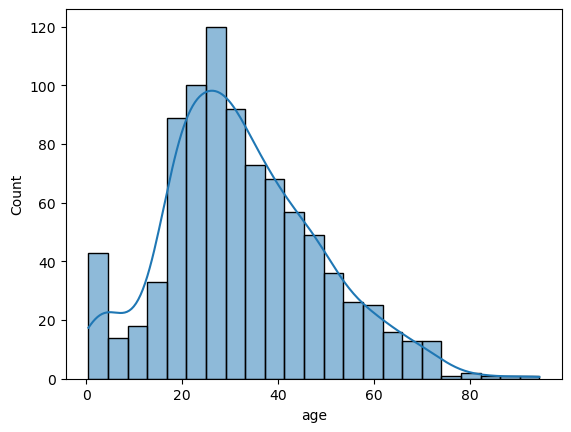

In [22]:
sns.histplot(df['age'], kde=True)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='Count'>

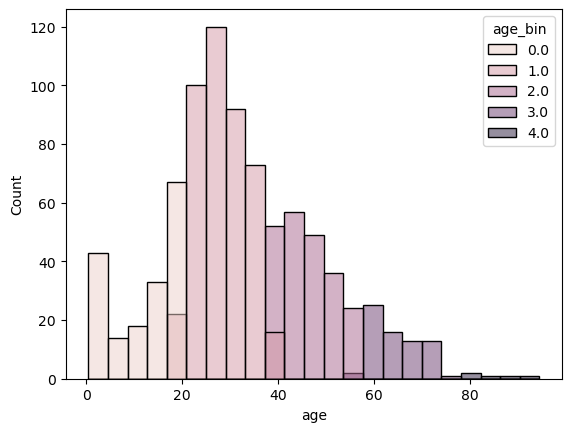

In [23]:
sns.histplot(df, x='age', hue='age_bin')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='Count'>

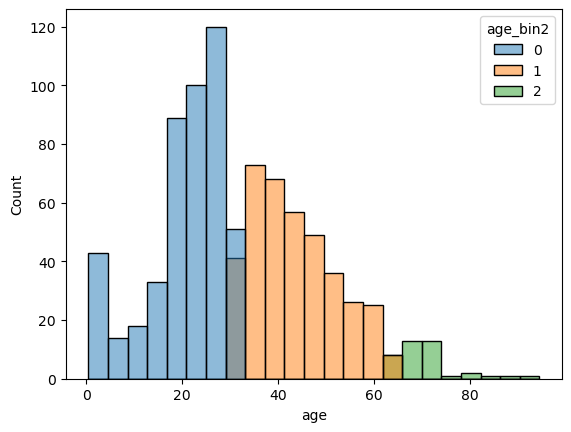

In [24]:
df['age_bin2']=pd.cut(df['age'], bins=3, labels=[0,1,2])
sns.histplot(df, x='age', hue='age_bin2')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='age', ylabel='Count'>

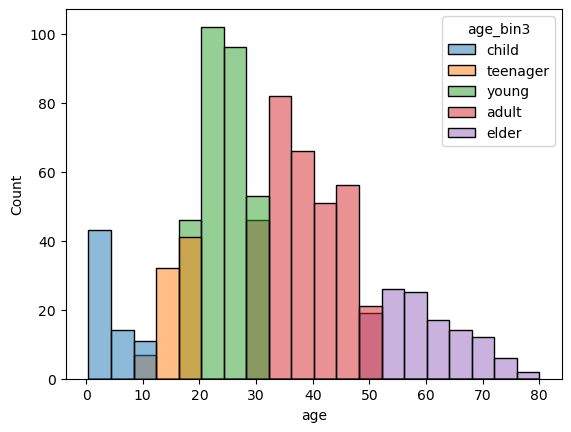

In [25]:
bins=[0,10,18,30,50,80]
labels=['child', 'teenager', 'young', 'adult', 'elder']
df['age_bin3']=pd.cut(df['age'], bins=bins, labels=labels)
sns.histplot(df, x='age', hue='age_bin3')